In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from astropy.io import fits
from astropy.table import Table
from pyfuncs import sortHLS
from IPython.display import display 

In [2]:

dat = Table.read(r'Test1.fits', format='fits')
df = dat.to_pandas()
n = 10
dataset = np.empty(n, dtype=object)
datasetX = np.empty(n, dtype=object)
datasetY = np.empty(n, dtype=object)

for i in range(n):
    dataset[i] = df.loc[np.array(range(df.shape[0])) % 100 == i, :]
for i in range(n):
    dataset[i].reset_index(drop=True,inplace=True)
    datasetX[i] = pd.DataFrame(StandardScaler().fit_transform(dataset[i][['dered_u','dered_g','dered_r','dered_i','dered_z']]),columns = ['dered_u','dered_g','dered_r','dered_i','dered_z'])
    datasetY[i] = dataset[i]['z']

# Read file (.json file that is generated by Main.ipynb)

In [3]:
# name/path of file that will be read 
fread = 'Test1 results/MainData (relu, adam).json'

mdata = pd.read_json(fread)

# Plot histogram of each different hidden layer size configuration

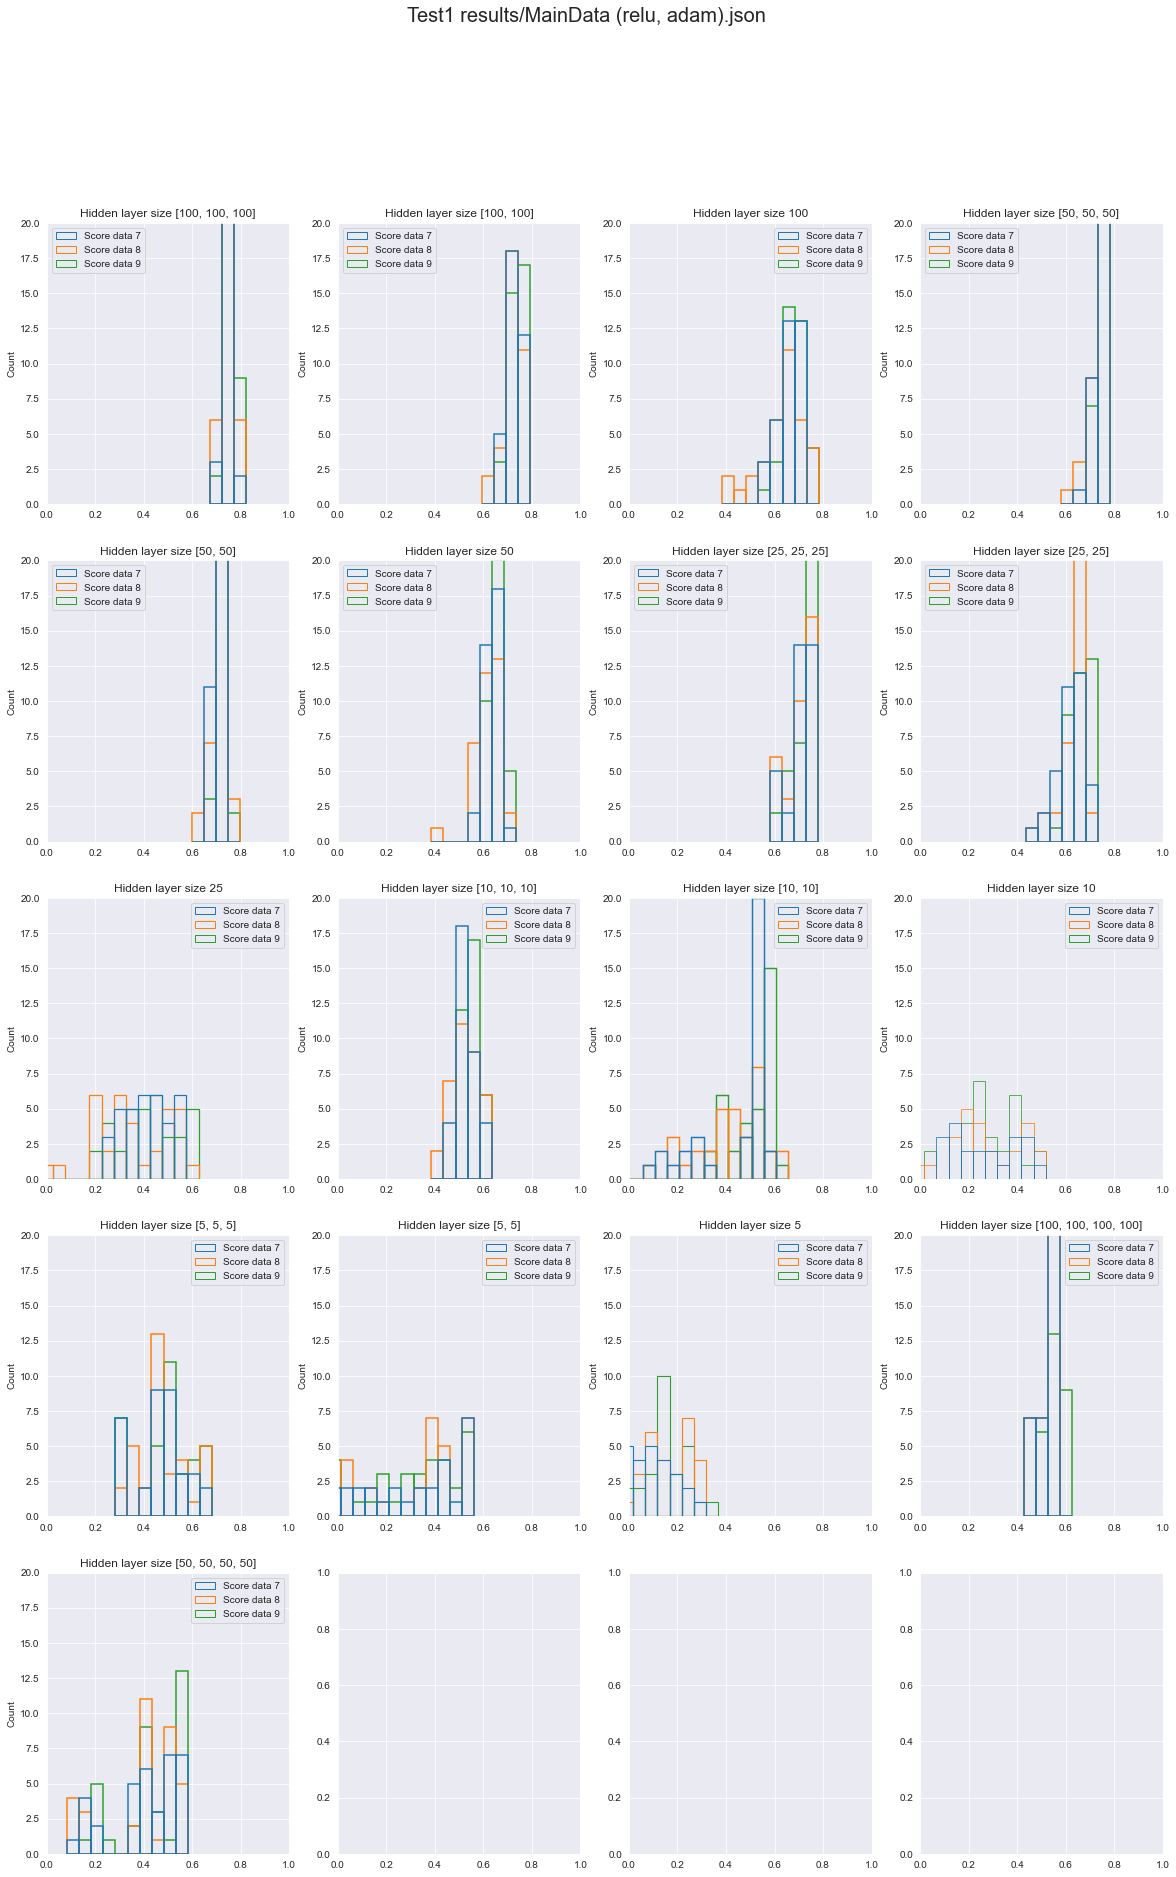

In [4]:

# size of subplot
row = 5
column = 4

fig, ax = plt.subplots(row,column, figsize = (20,30))
fig.suptitle(fread, fontsize = 20) 
n = 0
a = sortHLS(mdata)
num = len(a)

for i in range(row):
    for j in range(column):
        if n < num:
            sns.histplot(data = mdata[['Score data 7', 'Score data 8', 'Score data 9']].loc[a[n]], binwidth = 0.05, fill = False, ax = ax[i,j])
            title = 'Hidden layer size ' + str(mdata['Hidden layer size'].loc[a[n][0]])
            ax[i,j].set_title(title)
            ax[i,j].set_label('Coefficient of determination')
            ax[i,j].set_ylim(0,20)
            ax[i,j].set_xlim(0,1)
            n = n + 1

plt.show()

# Mean score (coefficient of determination) of each hidden layer size configuration

In [5]:
n = 0
a = sortHLS(mdata)
num = len(a)
Mean = pd.DataFrame()
for n in range(num):
    b = mdata[['Score data 7', 'Score data 8', 'Score data 9']].loc[a[n]].mean().T
    b['Hidden layer size'] = mdata['Hidden layer size'].loc[a[n][0]]
    Mean = Mean.append(b,ignore_index=True)
display(Mean)

,Hidden layer size,Score data 7,Score data 8,Score data 9
0,"[100, 100, 100]",0.746638,0.750488,0.759697
1,"[100, 100]",0.728859,0.722762,0.736726
2,100.0,0.664489,0.631319,0.683274
3,"[50, 50, 50]",0.736719,0.734126,0.746161
4,"[50, 50]",0.706314,0.709952,0.727470
5,50.0,0.635395,0.613136,0.658178
6,"[25, 25, 25]",0.707150,0.702955,0.714366
7,"[25, 25]",0.616498,0.638151,0.660902
8,25.0,0.410726,0.340029,0.420797
9,"[10, 10, 10]",0.532180,0.523090,0.552970


# Plot graph of predicted data VS sample data 

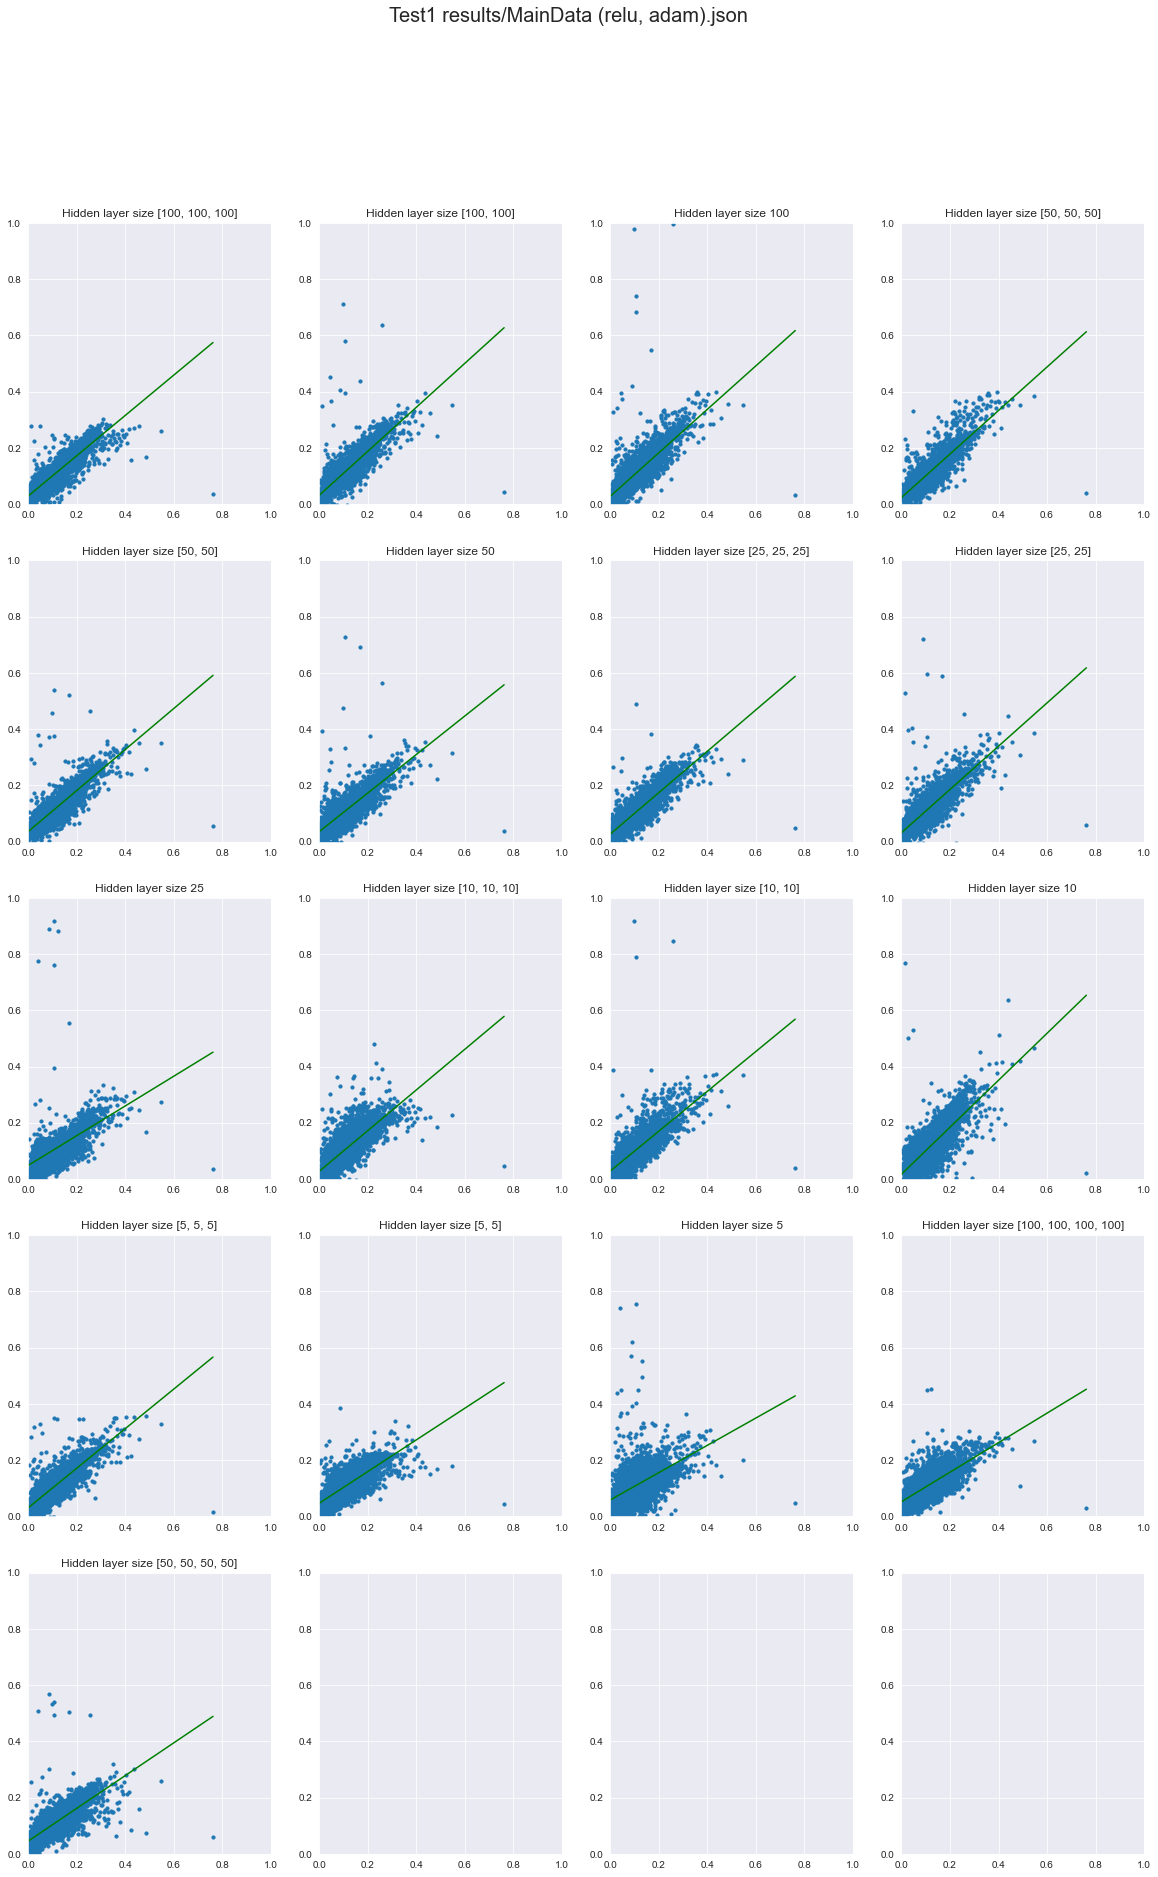

In [6]:
# size of subplot
row = 5
column = 4

# ypredict of a dataset (7, 8 or 9)
ypdat = 8

# random state of mlp
rdst = 33

# training dataset of mlp
Tdata = 2

# number of different random states in mdata
rdnum = 5

fig, ax = plt.subplots(row,column, figsize = (20,30))
fig.suptitle(fread, fontsize = 20)
n = 0
a = sortHLS(mdata)
num = len(a) 
crit = mdata[(mdata['Random state'] == rdst) & (mdata['Training data'] == ('dataset ' + str(Tdata)))] 
indx = crit.loc[:,'ypredict data ' + str(ypdat)].index

for i in range(row):
    for j in range(column):
        if n < num:
            ax[i,j].scatter(datasetY[ypdat], crit.loc[indx[n], 'ypredict data ' + str(ypdat)], s = 10)
            m, b = np.polyfit(datasetY[ypdat], crit.loc[indx[n], 'ypredict data ' + str(ypdat)], 1)
            ax[i,j].plot(datasetY[ypdat], m * datasetY[ypdat] + b, color = 'green')
            title = 'Hidden layer size ' + str(mdata['Hidden layer size'].loc[indx[n]])
            ax[i,j].set_title(title)
            ax[i,j].set_xlim(0,1)
            ax[i,j].set_ylim(0,1)
            n = n + 1
            
plt.show()

# Notes
## relu adam
performs better with more layers and nodes. Best performance could be seen in (100,100,100) with a score of ~0.75.
Worst performer is (5) with a score of ~0.50

## logistic adam
performs better with less layers and more nodes. Best performance could be seen in (100) with a score of ~0.60.
Worst performer is (5,5,5) with a score of ~0.23

## tanh adam
performs better with more layers and nodes. However, the top performers, (100,100,100), (50,50,50) and (25,25,25) performs almost equally well with a score of ~0.70. 
Worst performer is (5) with a score of ~-0.23

## relu sgd
performs better with more layers and nodes. However, overall perfomance is very very bad, with the best score being 0.38 and the worst being ~-1.07

## logistic sgd
performs better with less layers and more nodes. However, overall perfomance is bad, with the best score being ~0.39 and the worst being ~-0.07

## tanh sgd
performs better with more layers and nodes. However, overall performance is bad, with the best score being ~0.46 and the worst being ~-1.13